## Step 1

Num samples class_0 2220
Num samples class_1 2250


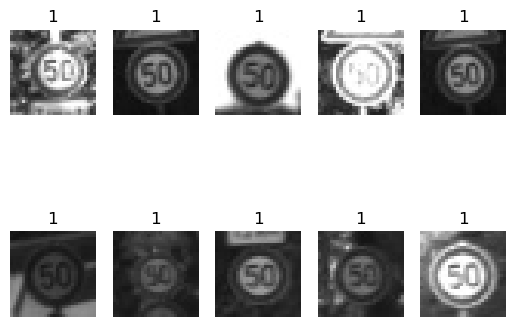

In [44]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Folder path for homework dataset
folder = 'subset_homework/'

# Load images for class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

# Visualize some examples from class 0
for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

# Load images for class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

# Visualize some examples from class 1
for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))


## Step 2

Shape of pixels: (4470, 784)
Elapsed time: 0.022939443588256836
Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 0.4134
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.2732
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - loss: 0.2209
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.1834
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.1576
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1466
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1277
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1168
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.1057
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - loss: 0.1060


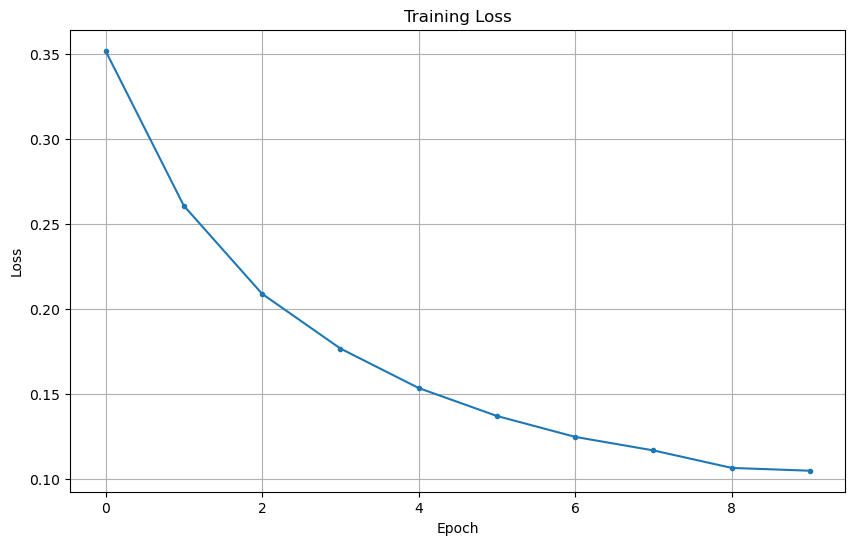

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
Accuracy: 0.9156599552572707


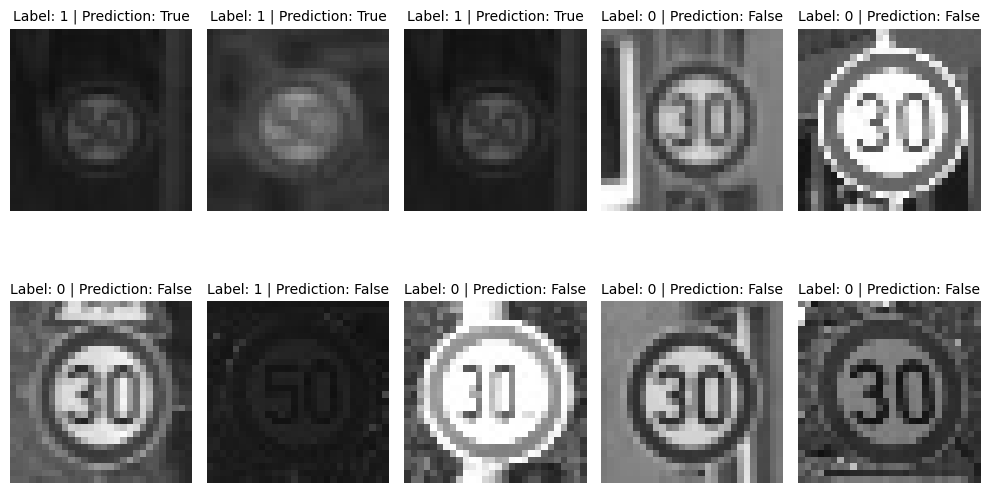

In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.utils import shuffle
from time import time
import matplotlib.pyplot as plt 

# Prepare images and labels
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

# Flatten images into 1D and normalize
start = time()
pixels = np.array([image.flatten() for image in images]) / 255
stop = time()

print('Shape of pixels:', pixels.shape)
print('Elapsed time:', stop - start)

# Build simple neural network with one neuron
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(pixels, labels, epochs=10, batch_size=32)

# Plot training history
h = history.history
epochs = range(len(h['loss']))

# Create a new figure for the loss plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, h['loss'], '.-')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluate performance
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = np.sum(predictions == labels)
accuracy = correct / len(labels)

print('Accuracy:', accuracy)

# Display some images with predictions
plt.figure(figsize=(10, 6)) 

for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels[idx]} | Prediction: {predictions[idx]}', fontsize=10) 
    plt.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.6)  
plt.tight_layout() 
plt.show()


## Step 3

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6457 - loss: 0.6417
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7966 - loss: 0.4875
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8826 - loss: 0.3568
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9100 - loss: 0.2765
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9072 - loss: 0.2615
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.2094
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9374 - loss: 0.1854
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1728
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9450 - loss: 0.1667  
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9510 - loss: 0.1532


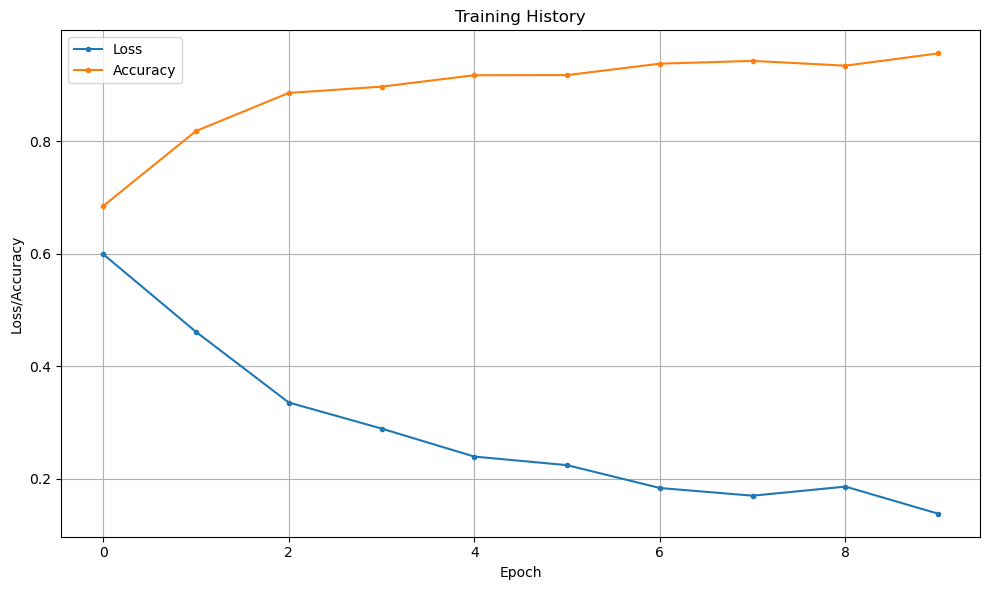

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Improved Accuracy: 0.9659955257270694


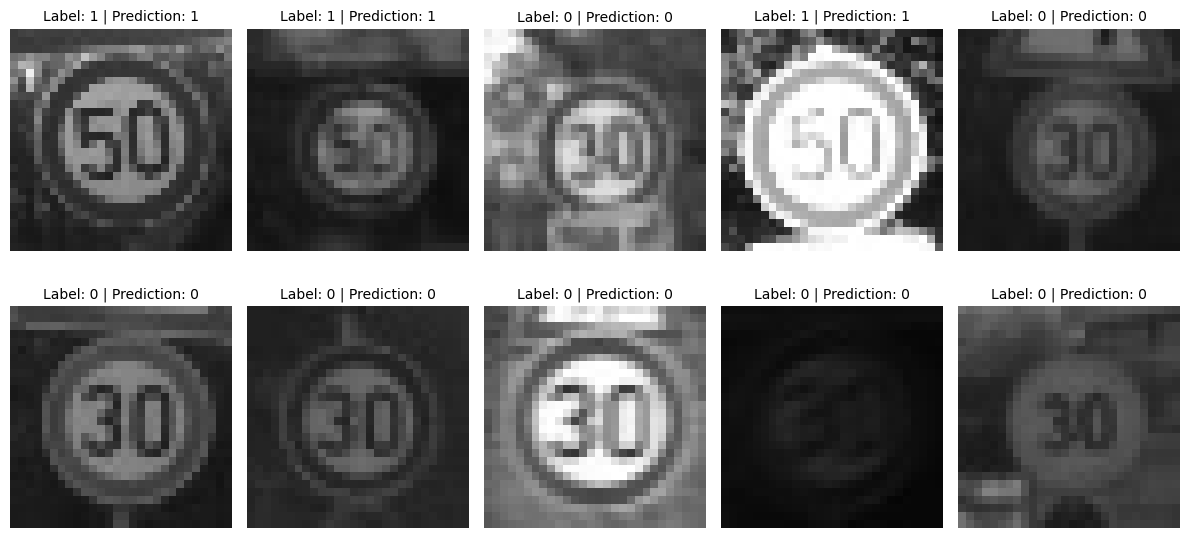

In [48]:
# Build the neural network
inputs = Input(shape=(pixels.shape[1],))
x = Dense(64, activation="relu")(inputs)
x = Dense(32, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(pixels, labels, epochs=10, batch_size=32)

# Plot the training history
h = history.history
epochs = range(len(h['loss']))
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, h['loss'], '.-', label='Loss')
plt.plot(epochs, h['accuracy'], '.-', label='Accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Training History')
plt.tight_layout()  
plt.show()

# Evaluate the model performance
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = np.sum(predictions == labels)
accuracy = correct / len(labels)

print('Improved Accuracy:', accuracy)

# Display some images with predictions
plt.figure(figsize=(12, 6))  
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(f'Label: {labels[idx]} | Prediction: {int(predictions[idx])}', fontsize=10)
    plt.axis('off') 
plt.tight_layout() 
plt.show()
